<a href="https://colab.research.google.com/github/gsalgadod/prediccion_ventas/blob/main/Proyecto_1_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [160]:
filename = "/content/drive/MyDrive/Coding Dojo/Data Frames/sales_predictions.csv"
df = pd.read_csv(filename)
dfo = df.copy() # Se genera una copia del dataframe original para futuras revisiones. 
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


# Información del proyecto

El proyecto está basado en un dataframe con información sobre ventas de productos alimenticios que se venden en varias tiendas. Se tiene como objetivo ayudar al vendedor a comprender las propiedades de los productos y los puntos de venta que desempeñan un papel crucial en el aumento de ventas.

A continuación se presenta la información de las columnas del dataset:

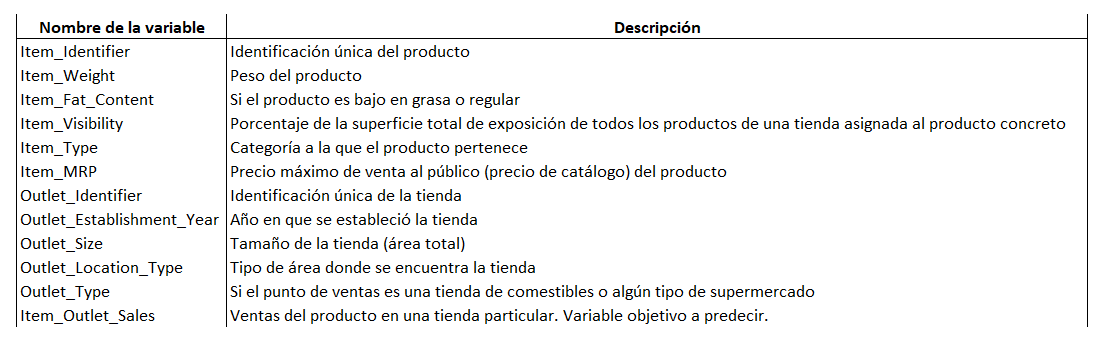

Como se puede apreciar en la tabla anterior, el objetivo final es realizar una predicción del comportamiento de la variable Item_Outlet_Sales.

# Análisis y Limpieza de Datos
Para comenzar el proyecto, se realiza una revisión general del dataset, teniendo como objetivo tener un mejor entendimiento de los datos que se tiene, para posteriormente realizar una limpieza de los mismos. 

In [161]:
#El primer paso que se realiza es utilizar el método .info() para tener una noción de los tipos de variables y la cantidad de valores nulos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [162]:
#Con el atributo .shape se obtiene la cantidad de filas y columnas que tiene el dataset
df.shape

(8523, 12)

El dataframe tiene 12 diferentes columnas y 8523 filas.

In [163]:
#Con el atributo dtypes se aprecian los tipos de variables de cada una de las columnas.
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [164]:
#Revisión de duplicados
df.duplicated().sum() #Mediante el uso de esta línea de código, se verifica que el dataframe no tiene duplicados.

0

In [165]:
#Identificación de valores faltantes (NaN)
df.isna().sum() 

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Se observa que existen solo dos columnas que contienen valores NaN, estas son: Item_Weight (que contiene el peso del producto) y Outlet_Size (que contiene el tipo de tamaño de la tienda).

# Datos Faltantes

El primer paso que se realizará es estudiar la relación entre los valores faltantes de Item_Weight y las otras variables.

In [166]:
filtro_peso_vacio = df["Item_Weight"].isna() #Se genera un filtro con los valores de Item_Weight vacíos
df[filtro_peso_vacio]["Outlet_Identifier"].value_counts() #Se estudia la relación entre los valores Item_Weight vacíos y el Outlet_Identifier

OUT027    935
OUT019    528
Name: Outlet_Identifier, dtype: int64

Se observa que los valores de peso vacío están concentrados en solo dos tiendas. A continuación se obtiene una lista con todas las tiendas del dataset.

Como se muestra en la tabla siguiente, el dataset tiene información de un total de 10 tiendas. 

In [167]:
df["Outlet_Identifier"].value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [168]:
#Se revisa que no hayan elementos con peso 0
peso_0 = df["Item_Weight"] == 0
df[peso_0] #se aprecia que no hay elementos

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


A continuación se buscará los pesos promedios de los ítems sin peso en la data de las tiendas que si tienen información.

In [169]:
filtro_tiendas_datos = (df["Outlet_Identifier"]!="OUT027") & (df["Outlet_Identifier"]!="OUT019") #Se crea un filtro que contiene a las tiendas que si tienen información del peso
df2 = df[filtro_tiendas_datos]
df3 =df2.groupby("Item_Identifier")["Item_Weight"].mean().reset_index()#Se agrupan los pesos promedio para cada uno de los ítems en las tiendas con información y se crea un df con dos columnas
df3.iloc[:,0]

0       DRA12
1       DRA24
2       DRA59
3       DRB01
4       DRB13
        ...  
1550    NCZ30
1551    NCZ41
1552    NCZ42
1553    NCZ53
1554    NCZ54
Name: Item_Identifier, Length: 1555, dtype: object

In [172]:
type(df3) #Se verifica que se esté trabajando con un dataframe, esto es importante para la siguiente parte

pandas.core.frame.DataFrame

A continuación, se realiza una rutina que recorra todos los elementos del df. En aquellos casos en que el peso es nulo, buscará el valor correspondiente en la lista previamente creada y lo actualizará.

In [170]:
largo1 = df.shape[0] #Cantidad de datos del dataframe
largo2 = df3.shape[0] #Cantidad de datos del df creado con los precios e ítems de las tiendas con datos
for x in range (0, largo1): #Se recorren todos los elementos del dataframe
  if pd.isna(df["Item_Weight"][x]): #Para aquellos casos en que el valor del peso es nulo, se entra en el if
    for y in range (0,largo2): #Se crea un nuevo for para recorrer el dataframe creado con los pesos obtenidos de las otras tiendas
      if df3.iloc[y,0] ==df["Item_Identifier"].iloc[x]: #Cuando hay coincidencia entre el nombre del producto en ambos df, se actualiza el valor
        reemplazo = df3.iloc[y,1] #se obtiene el valor "correcto" del peso del producto
        df["Item_Weight"].iloc[x] = reemplazo #Se actualiza el valor
df["Item_Weight"].isna().sum() #Se verifica que hay un total de 4 elementos que siguen teniendo valores nulos. Se decide eliminar estas filas.

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


4

In [176]:
df.dropna(subset=["Item_Weight"], inplace=True) # Se eliminan las 4 filas restantes que presentaban valores nulos de peso
df.isna().sum() #Se verifica que no queden elementos nulos en la columna Item_Weight

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Relleno información columna Outlet_Size

In [ ]:
df["Outlet_Size"].value_counts() #Se revisan los posibles valores de la columna.

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [178]:
#Con la intención de hacer un cruce entre la información de la columna Outlet_Size y la columna Outlet_type, se revisan los posibles valores de esta
df["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1082
Supermarket Type3     932
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [ ]:
#Se crea un filtro con las filas que tienen el atributo Outlet_Size nulo
filtro_size_vacio = df["Outlet_Size"].isna()
df[filtro_size_vacio]["Outlet_Type"].value_counts()

Supermarket Type1    1855
Grocery Store         555
Name: Outlet_Type, dtype: int64

Se puede apreciar que la mayoría de las filas vacías tienen como tipo de outlet Supermarket Type1


In [ ]:
#Se realiza un filtro para ver la relación entre Supermarket Type1 y Outlet_Size
filtro_supermercados = df["Outlet_Type"]=="Supermarket Type1"
df[filtro_supermercados]["Outlet_Size"].value_counts()

Small     1860
High       932
Medium     930
Name: Outlet_Size, dtype: int64


Del filtro previamente creado se aprecia que más del 50% de los outlet tipo Supermarket Type1 tienen un tamaño Small. Considerando lo anterior, a los 1855 valores de Supermarket Type 1 sin el atributo Outlet Size, se le asignará el tamaño Small. 

In [177]:
#De forma análoga se realiza un filtro para ver la relación entre Grocery Store y Outlet_Size
filtro_supermercados2 = df["Outlet_Type"]=="Grocery Store"
df[filtro_supermercados2]["Outlet_Size"].value_counts()

Small    527
Name: Outlet_Size, dtype: int64

Previamente se había visto que existen 1083 Grocery Store. El filtro previamente realizado muestra que de estos, 527 presentan tamaño Small. Tiene sentido que estos números difieran, ya que hay 555 outlet tipo Grocery Store sin información del tamaño. 

Considerando lo recientemente observado, se decide reemplazar todos los valores de Outlet_Size faltantes con el valor Small.

In [188]:
df["Outlet_Size"].fillna(value="Small", inplace = True) #Se realiza el reemplazo
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Con lo anterior, se verifica que no existen elementos vacíos en el dataframe. 

Revisión de categorías inconsistentes:

Mediante el método .value_counts() se realiza una revisión de los datos que están contenidos en las variables con categorías.


In [189]:
df["Item_Fat_Content"].value_counts() #Revisión inconsistencias categoría Item_Fat_Content


Low Fat    5088
Regular    2886
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

De la revisión se observa que hay valores mal ingresados. Se realizarán las siguientes correcciones:
1. LF se reemplazará por Low Fat
2. reg se reemplazará por Regular
3. lof fat se reemplazará por Low Fat

In [198]:
dic_reemplazo = {"LF":"Low Fat",  #Se crea un diccionario en el que se almacenan los cambios
                 "reg":"Regular",
                 "low fat":"Low Fat",}
df["Item_Fat_Content"].replace(dic_reemplazo, inplace = True) # Se realizan los cambios 
df["Item_Fat_Content"].value_counts() #Se verifica que los cambios fueron exitosos.

Low Fat    5516
Regular    3003
Name: Item_Fat_Content, dtype: int64

In [197]:
df["Item_Type"].value_counts() #Revisión inconsistencias categoría Item_Type. No se encuentra ninguna inconsistencia.

Fruits and Vegetables    1232
Snack Foods              1199
Household                 910
Frozen Foods              855
Dairy                     681
Canned                    649
Baking Goods              647
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [192]:
df["Outlet_Establishment_Year"].value_counts() #Revisión inconsistencias categoría Outlet_Establishment_Year
#Se obtienen 9 valores, pero uno de ellos cuenta los años para dos tiendas, por lo que los valores son consistentes con lo esperado.
#No se encuentra ninguna inconsistencia.

1985    1459
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [193]:
df["Outlet_Location_Type"].value_counts() #Revisión inconsistencias categoría Outlet_Establishment_Year. No se encuentra ninguna inconsistencia.

Tier 3    3347
Tier 2    2785
Tier 1    2387
Name: Outlet_Location_Type, dtype: int64

Resumen estadísticas

In [199]:
df.describe().round(3)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8519.000,8519.000,8519.000,8519.000,8519.000
mean,12.875,0.066,141.010,1997.838,2181.189
std,4.646,0.052,62.284,8.369,1706.511
min,4.555,0.000,31.290,1985.000,33.290
25%,8.785,0.027,93.845,1987.000,834.247
50%,12.650,0.054,143.047,1999.000,1794.331
75%,16.850,0.095,185.677,2004.000,3100.631
max,21.350,0.328,266.888,2009.000,13086.965
